In [31]:
import numpy as np
import pandas as pd
import sklearn
import tensorflow as tf
import matplotlib.pyplot as plt

# Check for TensorFlow GPU access
print(f"TensorFlow has access to the following devices:\n{tf.config.list_physical_devices()}")

# See TensorFlow version: working on tensorflow-macos: 2.9.0, tensorflow-metal: 0.5.0 (https://developer.apple.com/metal/tensorflow-plugin/)
print(f"TensorFlow version: {tf.__version__}") 

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Dense

import urllib.request
import zipfile

from tensorflow.keras.preprocessing.image import ImageDataGenerator

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from keras.preprocessing import image

import tensorflow.keras as keras

from tensorflow.keras.applications.inception_v3 import InceptionV3 

TensorFlow has access to the following devices:
[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
TensorFlow version: 2.9.0


In [32]:
!pip list

Package                       Version
----------------------------- -----------
absl-py                       1.4.0
anyio                         3.6.2
appdirs                       1.4.4
appnope                       0.1.3
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
asttokens                     2.2.1
astunparse                    1.6.3
attrs                         22.2.0
backcall                      0.2.0
backports.functools-lru-cache 1.6.4
beautifulsoup4                4.11.1
bleach                        5.0.1
brotlipy                      0.7.0
cached-property               1.5.2
cachetools                    5.2.1
certifi                       2022.12.7
cffi                          1.15.1
charset-normalizer            3.0.1
click                         8.1.3
comm                          0.1.2
contourpy                     1.0.7
cryptography                  39.0.0
cycler                        0.11.0
debugpy                       1.6.5
decorator

In [33]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Dense


model = Sequential([Dense(units=1, input_shape=[1])])
# only one line in Sequential so our neural network consists of only one layer
# many different layer types. 'Dense' means a set of fully connected neurons (most common)
# 'units=1' means only one neuron in entire neural network
# input data is only X here so 'input_shape=[1]' 


model.compile(optimizer='sgd', loss='mean_squared_error')
# sgd (stochastic gradient descent) - mathematical function that, when given the values, the previous guess, and
# the results of calculating the errors (or loss) on that guess, can then generate another one. Over time, its
# job is to minimize the loss, and by doing so bring the guessed formula closer and closer to the correct answer.

xs = np.array([-1.0, 0.0, 1.0, 2.0, 3.0, 4.0], dtype=float)
ys = np.array([-3.0, -1.0, 1.0, 3.0, 5.0, 7.0], dtype=float)

model.fit(xs, ys, epochs=500) 
# epochs "number of passes a training dataset takes around an algorithm" -simplilearn
# read it as 'fit the Xs to the Ys, and try it 500 times'

print(model.predict([10.0]))
# run prediction using model

Epoch 1/500
1/1 [==============================] - 0s 142ms/step - loss: 29.3809
Epoch 2/500
1/1 [==============================] - 0s 5ms/step - loss: 23.4257
Epoch 3/500
1/1 [==============================] - 0s 5ms/step - loss: 18.7340
Epoch 4/500
1/1 [==============================] - 0s 8ms/step - loss: 15.0365
Epoch 5/500
1/1 [==============================] - 0s 5ms/step - loss: 12.1214
Epoch 6/500
1/1 [==============================] - 0s 4ms/step - loss: 9.8220
Epoch 7/500
1/1 [==============================] - 0s 7ms/step - loss: 8.0071
Epoch 8/500
1/1 [==============================] - 0s 6ms/step - loss: 6.5734
Epoch 9/500
1/1 [==============================] - 0s 6ms/step - loss: 5.4399
Epoch 10/500
1/1 [==============================] - 0s 5ms/step - loss: 4.5425
Epoch 11/500
1/1 [==============================] - 0s 5ms/step - loss: 3.8312
Epoch 12/500
1/1 [==============================] - 0s 4ms/step - loss: 3.2662
Epoch 13/500
1/1 [==============================] - 0s

2023-01-29 20:25:53.503386: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Epoch 23/500
1/1 [==============================] - 0s 4ms/step - loss: 1.1614
Epoch 24/500
1/1 [==============================] - 0s 7ms/step - loss: 1.1102
Epoch 25/500
1/1 [==============================] - 0s 6ms/step - loss: 1.0659
Epoch 26/500
1/1 [==============================] - 0s 4ms/step - loss: 1.0271
Epoch 27/500
1/1 [==============================] - 0s 5ms/step - loss: 0.9927
Epoch 28/500
1/1 [==============================] - 0s 5ms/step - loss: 0.9618
Epoch 29/500
1/1 [==============================] - 0s 10ms/step - loss: 0.9338
Epoch 30/500
1/1 [==============================] - 0s 6ms/step - loss: 0.9081
Epoch 31/500
1/1 [==============================] - 0s 4ms/step - loss: 0.8844
Epoch 32/500
1/1 [==============================] - 0s 4ms/step - loss: 0.8622
Epoch 33/500
1/1 [==============================] - 0s 4ms/step - loss: 0.8413
Epoch 34/500
1/1 [==============================] - 0s 4ms/step - loss: 0.8215
Epoch 35/500
1/1 [==============================] -

1/1 [==============================] - 0s 6ms/step - loss: 0.1202
Epoch 127/500
1/1 [==============================] - 0s 4ms/step - loss: 0.1178
Epoch 128/500
1/1 [==============================] - 0s 4ms/step - loss: 0.1153
Epoch 129/500
1/1 [==============================] - 0s 5ms/step - loss: 0.1130
Epoch 130/500
1/1 [==============================] - 0s 4ms/step - loss: 0.1106
Epoch 131/500
1/1 [==============================] - 0s 3ms/step - loss: 0.1084
Epoch 132/500
1/1 [==============================] - 0s 5ms/step - loss: 0.1061
Epoch 133/500
1/1 [==============================] - 0s 4ms/step - loss: 0.1040
Epoch 134/500
1/1 [==============================] - 0s 5ms/step - loss: 0.1018
Epoch 135/500
1/1 [==============================] - 0s 5ms/step - loss: 0.0997
Epoch 136/500
1/1 [==============================] - 0s 4ms/step - loss: 0.0977
Epoch 137/500
1/1 [==============================] - 0s 4ms/step - loss: 0.0957
Epoch 138/500
1/1 [==============================] - 0

1/1 [==============================] - 0s 4ms/step - loss: 0.0145
Epoch 229/500
1/1 [==============================] - 0s 4ms/step - loss: 0.0142
Epoch 230/500
1/1 [==============================] - 0s 3ms/step - loss: 0.0139
Epoch 231/500
1/1 [==============================] - 0s 4ms/step - loss: 0.0136
Epoch 232/500
1/1 [==============================] - 0s 5ms/step - loss: 0.0133
Epoch 233/500
1/1 [==============================] - 0s 4ms/step - loss: 0.0130
Epoch 234/500
1/1 [==============================] - 0s 3ms/step - loss: 0.0128
Epoch 235/500
1/1 [==============================] - 0s 4ms/step - loss: 0.0125
Epoch 236/500
1/1 [==============================] - 0s 4ms/step - loss: 0.0123
Epoch 237/500
1/1 [==============================] - 0s 5ms/step - loss: 0.0120
Epoch 238/500
1/1 [==============================] - 0s 4ms/step - loss: 0.0118
Epoch 239/500
1/1 [==============================] - 0s 4ms/step - loss: 0.0115
Epoch 240/500
1/1 [==============================] - 0

1/1 [==============================] - 0s 3ms/step - loss: 0.0017
Epoch 331/500
1/1 [==============================] - 0s 4ms/step - loss: 0.0017
Epoch 332/500
1/1 [==============================] - 0s 3ms/step - loss: 0.0017
Epoch 333/500
1/1 [==============================] - 0s 3ms/step - loss: 0.0016
Epoch 334/500
1/1 [==============================] - 0s 4ms/step - loss: 0.0016
Epoch 335/500
1/1 [==============================] - 0s 4ms/step - loss: 0.0016
Epoch 336/500
1/1 [==============================] - 0s 4ms/step - loss: 0.0015
Epoch 337/500
1/1 [==============================] - 0s 4ms/step - loss: 0.0015
Epoch 338/500
1/1 [==============================] - 0s 4ms/step - loss: 0.0015
Epoch 339/500
1/1 [==============================] - 0s 4ms/step - loss: 0.0014
Epoch 340/500
1/1 [==============================] - 0s 4ms/step - loss: 0.0014
Epoch 341/500
1/1 [==============================] - 0s 5ms/step - loss: 0.0014
Epoch 342/500
1/1 [==============================] - 0

Epoch 429/500
1/1 [==============================] - 0s 3ms/step - loss: 2.2329e-04
Epoch 430/500
1/1 [==============================] - 0s 4ms/step - loss: 2.1871e-04
Epoch 431/500
1/1 [==============================] - 0s 4ms/step - loss: 2.1422e-04
Epoch 432/500
1/1 [==============================] - 0s 3ms/step - loss: 2.0981e-04
Epoch 433/500
1/1 [==============================] - 0s 3ms/step - loss: 2.0551e-04
Epoch 434/500
1/1 [==============================] - 0s 4ms/step - loss: 2.0129e-04
Epoch 435/500
1/1 [==============================] - 0s 4ms/step - loss: 1.9715e-04
Epoch 436/500
1/1 [==============================] - 0s 4ms/step - loss: 1.9310e-04
Epoch 437/500
1/1 [==============================] - 0s 4ms/step - loss: 1.8914e-04
Epoch 438/500
1/1 [==============================] - 0s 5ms/step - loss: 1.8525e-04
Epoch 439/500
1/1 [==============================] - 0s 4ms/step - loss: 1.8145e-04
Epoch 440/500
1/1 [==============================] - 0s 4ms/step - loss: 1.7

2023-01-29 20:25:56.206763: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [34]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Dense


l0 = Dense(units=1, input_shape=[1])
model = Sequential([l0])
model.compile(optimizer='sgd', loss='mean_squared_error')

xs = np.array([-1.0, 0.0, 1.0, 2.0, 3.0, 4.0], dtype=float)
ys = np.array([-3.0, -1.0, 1.0, 3.0, 5.0, 7.0], dtype=float)

model.fit(xs, ys, epochs=500) 

print(model.predict([10.0]))

print("Here is what I learned: {}".format(l0.get_weights()))
# neuron learns a weight and bias (Y = WX + B)

Epoch 1/500
1/1 [==============================] - 0s 94ms/step - loss: 29.3809
Epoch 2/500
1/1 [==============================] - 0s 4ms/step - loss: 23.4257
Epoch 3/500
1/1 [==============================] - 0s 4ms/step - loss: 18.7340
Epoch 4/500
1/1 [==============================] - 0s 5ms/step - loss: 15.0365
Epoch 5/500
1/1 [==============================] - 0s 4ms/step - loss: 12.1214
Epoch 6/500
1/1 [==============================] - 0s 4ms/step - loss: 9.8220
Epoch 7/500
1/1 [==============================] - 0s 4ms/step - loss: 8.0071
Epoch 8/500
1/1 [==============================] - 0s 5ms/step - loss: 6.5734
Epoch 9/500
1/1 [==============================] - 0s 4ms/step - loss: 5.4399
Epoch 10/500
1/1 [==============================] - 0s 5ms/step - loss: 4.5425
Epoch 11/500
1/1 [==============================] - 0s 5ms/step - loss: 3.8312
Epoch 12/500
1/1 [==============================] - 0s 4ms/step - loss: 3.2662
Epoch 13/500


2023-01-29 20:25:56.303204: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 5ms/step - loss: 2.8165
Epoch 14/500
1/1 [==============================] - 0s 6ms/step - loss: 2.4577
Epoch 15/500
1/1 [==============================] - 0s 4ms/step - loss: 2.1704
Epoch 16/500
1/1 [==============================] - 0s 5ms/step - loss: 1.9395
Epoch 17/500
1/1 [==============================] - 0s 6ms/step - loss: 1.7531
Epoch 18/500
1/1 [==============================] - 0s 4ms/step - loss: 1.6018
Epoch 19/500
1/1 [==============================] - 0s 5ms/step - loss: 1.4782
Epoch 20/500
1/1 [==============================] - 0s 4ms/step - loss: 1.3764
Epoch 21/500
1/1 [==============================] - 0s 6ms/step - loss: 1.2920
Epoch 22/500
1/1 [==============================] - 0s 5ms/step - loss: 1.2213
Epoch 23/500
1/1 [==============================] - 0s 5ms/step - loss: 1.1614
Epoch 24/500
1/1 [==============================] - 0s 5ms/step - loss: 1.1102
Epoch 25/500
1/1 [==============================] - 0s 5ms/step -

1/1 [==============================] - 0s 3ms/step - loss: 0.1480
Epoch 117/500
1/1 [==============================] - 0s 4ms/step - loss: 0.1449
Epoch 118/500
1/1 [==============================] - 0s 4ms/step - loss: 0.1419
Epoch 119/500
1/1 [==============================] - 0s 3ms/step - loss: 0.1390
Epoch 120/500
1/1 [==============================] - 0s 3ms/step - loss: 0.1362
Epoch 121/500
1/1 [==============================] - 0s 4ms/step - loss: 0.1334
Epoch 122/500
1/1 [==============================] - 0s 4ms/step - loss: 0.1306
Epoch 123/500
1/1 [==============================] - 0s 4ms/step - loss: 0.1279
Epoch 124/500
1/1 [==============================] - 0s 4ms/step - loss: 0.1253
Epoch 125/500
1/1 [==============================] - 0s 4ms/step - loss: 0.1227
Epoch 126/500
1/1 [==============================] - 0s 4ms/step - loss: 0.1202
Epoch 127/500
1/1 [==============================] - 0s 4ms/step - loss: 0.1178
Epoch 128/500
1/1 [==============================] - 0

1/1 [==============================] - 0s 4ms/step - loss: 0.0178
Epoch 219/500
1/1 [==============================] - 0s 3ms/step - loss: 0.0174
Epoch 220/500
1/1 [==============================] - 0s 4ms/step - loss: 0.0171
Epoch 221/500
1/1 [==============================] - 0s 4ms/step - loss: 0.0167
Epoch 222/500
1/1 [==============================] - 0s 3ms/step - loss: 0.0164
Epoch 223/500
1/1 [==============================] - 0s 3ms/step - loss: 0.0161
Epoch 224/500
1/1 [==============================] - 0s 4ms/step - loss: 0.0157
Epoch 225/500
1/1 [==============================] - 0s 4ms/step - loss: 0.0154
Epoch 226/500
1/1 [==============================] - 0s 4ms/step - loss: 0.0151
Epoch 227/500
1/1 [==============================] - 0s 4ms/step - loss: 0.0148
Epoch 228/500
1/1 [==============================] - 0s 4ms/step - loss: 0.0145
Epoch 229/500
1/1 [==============================] - 0s 4ms/step - loss: 0.0142
Epoch 230/500
1/1 [==============================] - 0

1/1 [==============================] - 0s 4ms/step - loss: 0.0021
Epoch 321/500
1/1 [==============================] - 0s 3ms/step - loss: 0.0021
Epoch 322/500
1/1 [==============================] - 0s 3ms/step - loss: 0.0021
Epoch 323/500
1/1 [==============================] - 0s 4ms/step - loss: 0.0020
Epoch 324/500
1/1 [==============================] - 0s 4ms/step - loss: 0.0020
Epoch 325/500
1/1 [==============================] - 0s 4ms/step - loss: 0.0019
Epoch 326/500
1/1 [==============================] - 0s 3ms/step - loss: 0.0019
Epoch 327/500
1/1 [==============================] - 0s 4ms/step - loss: 0.0019
Epoch 328/500
1/1 [==============================] - 0s 4ms/step - loss: 0.0018
Epoch 329/500
1/1 [==============================] - 0s 4ms/step - loss: 0.0018
Epoch 330/500
1/1 [==============================] - 0s 4ms/step - loss: 0.0017
Epoch 331/500
1/1 [==============================] - 0s 4ms/step - loss: 0.0017
Epoch 332/500
1/1 [==============================] - 0

1/1 [==============================] - 0s 4ms/step - loss: 2.7480e-04
Epoch 420/500
1/1 [==============================] - 0s 4ms/step - loss: 2.6915e-04
Epoch 421/500
1/1 [==============================] - 0s 4ms/step - loss: 2.6363e-04
Epoch 422/500
1/1 [==============================] - 0s 4ms/step - loss: 2.5821e-04
Epoch 423/500
1/1 [==============================] - 0s 4ms/step - loss: 2.5291e-04
Epoch 424/500
1/1 [==============================] - 0s 4ms/step - loss: 2.4771e-04
Epoch 425/500
1/1 [==============================] - 0s 3ms/step - loss: 2.4262e-04
Epoch 426/500
1/1 [==============================] - 0s 4ms/step - loss: 2.3764e-04
Epoch 427/500
1/1 [==============================] - 0s 4ms/step - loss: 2.3276e-04
Epoch 428/500
1/1 [==============================] - 0s 4ms/step - loss: 2.2798e-04
Epoch 429/500
1/1 [==============================] - 0s 4ms/step - loss: 2.2329e-04
Epoch 430/500
1/1 [==============================] - 0s 4ms/step - loss: 2.1871e-04
Epoch 

2023-01-29 20:25:58.875947: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


## Chapter 2

In [35]:
import tensorflow as tf
data = tf.keras.datasets.fashion_mnist

# loading fashion MNIST data
(training_images, training_labels), (test_images, test_labels) = data.load_data()

# normalizing the image - ensures every pixel is represented by a number between 0 and 1
# normalizing is important to ensure the model is trained well
training_images  = training_images / 255.0
test_images = test_images / 255.0

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
    ])
# line 1: input layer specification: flatten takes the 2d array and turns into a line - 1d array
# line 2: middle layer (hidden layer): layer of 128 neurons
# line 3 output layer : 10 neurons as we have 10 classes

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=5)

Epoch 1/5
  28/1875 [..............................] - ETA: 7s - loss: 1.4550 - accuracy: 0.5045

2023-01-29 20:25:59.694569: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - 7s 4ms/step - loss: 0.4963 - accuracy: 0.8251
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3702 - accuracy: 0.8658
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3349 - accuracy: 0.8781
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3138 - accuracy: 0.8843
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2925 - accuracy: 0.8932


In [36]:
model.evaluate(test_images, test_labels) # test on test data

 41/313 [==>...........................] - ETA: 1s - loss: 0.3598 - accuracy: 0.8765

2023-01-29 20:26:37.603864: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 1s 4ms/step - loss: 0.3586 - accuracy: 0.8678


[0.3586219847202301, 0.8678000569343567]

In [37]:
classifications = model.predict(test_images) 
print(classifications[1]) 
print(test_labels[1])

113/313 [=========>....................] - ETA: 0s

2023-01-29 20:26:38.893369: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 0s 1ms/step
[4.7287893e-05 2.0121483e-11 9.9502444e-01 6.2997941e-07 2.1778149e-04
 2.6480334e-08 4.7097718e-03 4.5915134e-09 6.4935177e-09 1.3559744e-09]
2


In [ ]:
import tensorflow as tf
data = tf.keras.datasets.fashion_mnist

# loading fashion MNIST data
(training_images, training_labels), (test_images, test_labels) = data.load_data()

# normalizing the image - ensures every pixel is represented by a number between 0 and 1
# normalizing is important to ensure the model is trained well
training_images  = training_images / 255.0
test_images = test_images / 255.0

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
    ])
# line 1: input layer specification: flatten takes the 2d array and turns into a line - 1d array
# line 1: (28, 28) as image size is 28 * 28
# line 2: middle layer (hidden layer): layer of 128 neurons
# line 3 output layer : 10 neurons as we have 10 classes

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=50) # discovering overfitting

Epoch 1/50
  19/1875 [..............................] - ETA: 10s - loss: 1.5853 - accuracy: 0.4655

2023-01-29 20:26:40.011567: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - 8s 4ms/step - loss: 0.4933 - accuracy: 0.8271
Epoch 2/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3696 - accuracy: 0.8672
Epoch 3/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3341 - accuracy: 0.8784
Epoch 4/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3099 - accuracy: 0.8868
Epoch 5/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2931 - accuracy: 0.8917
Epoch 6/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2787 - accuracy: 0.8963
Epoch 7/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2664 - accuracy: 0.9010
Epoch 8/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2574 - accuracy: 0.9045
Epoch 9/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2468 - accuracy: 0.9074
Epoch 10/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2363 - accurac

In [ ]:
model.evaluate(test_images, test_labels) # test on test data

### Automatically stopping training after reaching a particular accuracy

In [ ]:
import tensorflow as tf 

class myCallback(tf.keras.callbacks.Callback): 
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy')>0.95):
            print("\nReached 95% accuracy so cancelling training!") 
            self.model.stop_training = True
            
callbacks = myCallback()
mnist = tf.keras.datasets.fashion_mnist

(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer='adam',
                   loss='sparse_categorical_crossentropy',
                   metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=50, callbacks=[callbacks])

## Chapter 3

### Adding a Convolutional Neural Network (CNN) to Fashion MNIST

In [ ]:
import tensorflow as tf

data = tf.keras.datasets.fashion_mnist 

(training_images, training_labels), (test_images, test_labels) = data.load_data()

training_images = training_images.reshape(60000, 28, 28, 1) # input shape needs to match Conv2D layer- 60,000 images
training_images = training_images / 255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images = test_images / 255.0

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
# line 1: '64': number of convolutions (will learn which is the best), (3, 3): is the size of the filter
# line 1: (28, 28, 1): 28 * 28 image (same as before), Conv2D layers designed for RGB, our dataset is monochrome (1)
# line 2: pooling layer in NN. 2 * 2 pool.

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=20)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images) 
print(classifications[0]) 
print(test_labels[0])

In [ ]:
model.summary()

### Building a CNN to Distinguish Between Horses and Humans

In [ ]:
import urllib.request
import zipfile

url = "https://storage.googleapis.com/learning-datasets/horse-or-human.zip"

file_name = "horse-or-human.zip"
training_dir = 'horse-or-human/training/'
urllib.request.urlretrieve(url, file_name)

zip_ref = zipfile.ZipFile(file_name, 'r')
zip_ref.extractall(training_dir)
zip_ref.close()
# downloading the images

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255)

train_generator = train_datagen.flow_from_directory(
    training_dir,
    target_size=(300, 300), # size of image
    class_mode='binary' # binary if two kinds of images, categorical if more than 2
)

model = tf.keras.models.Sequential([
      tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
      tf.keras.layers.MaxPooling2D(2, 2),
      tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(512, activation='relu'),
      tf.keras.layers.Dense(1, activation='sigmoid')
])
# more layers as image is much bigger than MNIST. (300*300)
# (300, 300, 3) full color so 3.
# last layer has one neuron as it is a binary classifier. 
# sigmoid function: to drive one set of values to 0 and other toward 1

model.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.RMSprop(lr=0.001), metrics=['accuracy'])

# history = model.fit_generator(
#       train_generator,
#       epochs=15
# )

In [ ]:
validation_url = "https://storage.googleapis.com/learning-datasets/validation-horse-or-human.zip"

validation_file_name = "validation-horse-or-human.zip"
validation_dir = 'horse-or-human/validation/'
urllib.request.urlretrieve(validation_url, validation_file_name)

zip_ref = zipfile.ZipFile(validation_file_name, 'r')
zip_ref.extractall(validation_dir)
zip_ref.close()
# downloading the validation dataset

In [ ]:
validation_datagen = ImageDataGenerator(rescale=1/255)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(300, 300),
    class_mode='binary'
)

history = model.fit_generator(
    train_generator,
    epochs=15,
    validation_data=validation_generator
)

### Testing the dataset with other images

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [ ]:
import numpy as np
from keras.preprocessing import image

path = 'test/boy-1284509_1920.jpg'

# displaying the image
img = mpimg.imread(path)
imgplot = plt.imshow(img)
plt.show()

img = tf.keras.utils.load_img(path, target_size=(300,300))
x = tf.keras.utils.img_to_array(img)
x = np.expand_dims(x, axis=0)

image_tensor = np.vstack([x])
classes = model.predict(image_tensor)
print(classes)
print(classes[0])
if classes[0] > 0.5:
    print("the image is of a human")
else:
    print("the image is of a horse")
    

In [ ]:
import numpy as np
from keras.preprocessing import image

path = 'test/horse-1330690_1920.jpg'

img1 = mpimg.imread(path)
imgplot = plt.imshow(img1)
plt.show()

img = tf.keras.utils.load_img(path, target_size=(300,300))
x = tf.keras.utils.img_to_array(img)
x = np.expand_dims(x, axis=0)

image_tensor = np.vstack([x])
classes = model.predict(image_tensor)

print(classes)
print(classes[0])

if classes[0] > 0.5:
    print("the image is of a human")
else:
    print("the image is of a horse")

In [ ]:
import numpy as np
from keras.preprocessing import image

path = 'test/business-1287044_1920.jpg'

img1 = mpimg.imread(path)
imgplot = plt.imshow(img1)
plt.show()

img = tf.keras.utils.load_img(path, target_size=(300,300))
x = tf.keras.utils.img_to_array(img)
x = np.expand_dims(x, axis=0)

image_tensor = np.vstack([x])
classes = model.predict(image_tensor)

print(classes)
print(classes[0])

if classes[0] > 0.5:
    print("the image is of a human")
else:
    print("the image is of a horse")

In [ ]:
import numpy as np
from keras.preprocessing import image

path = 'test/out-0.jpeg'

img1 = mpimg.imread(path)
imgplot = plt.imshow(img1)
plt.show()

img = tf.keras.utils.load_img(path, target_size=(300,300))
x = tf.keras.utils.img_to_array(img)
x = np.expand_dims(x, axis=0)

image_tensor = np.vstack([x])
classes = model.predict(image_tensor)

print(classes)
print(classes[0])

if classes[0] > 0.5:
    print("the image is of a human")
else:
    print("the image is of a horse")

In [ ]:
import numpy as np
from keras.preprocessing import image

path = 'test/icelandic-horse-1178169612-bb949fbfde104e5182b30c829d57de17.jpg'

img1 = mpimg.imread(path)
imgplot = plt.imshow(img1)
plt.show()

img = tf.keras.utils.load_img(path, target_size=(300,300))
x = tf.keras.utils.img_to_array(img)
x = np.expand_dims(x, axis=0)

image_tensor = np.vstack([x])
classes = model.predict(image_tensor)

print(classes)
# print(classes[0])

if classes[0] > 0.5:
    print("the image is of a human")
else:
    print("the image is of a horse")

### Training with Image Augmentation

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# The following lines will rescale, rotate, shift horizontallya and vertically, shear, zoom, flip.
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = train_datagen.flow_from_directory(
    training_dir,
    target_size=(300, 300), # size of image
    # batch_size=128,
    class_mode='binary' # binary if two kinds of images, categorical if more than 2
)

model = tf.keras.models.Sequential([
      tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
      tf.keras.layers.MaxPooling2D(2, 2),
      tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(512, activation='relu'),
      tf.keras.layers.Dense(1, activation='sigmoid')
])
# more layers as image is much bigger than MNIST. (300*300)
# (300, 300, 3) full color so 3.
# last layer has one neuron as it is a binary classifier. 
# sigmoid function: to drive one set of values to 0 and other toward 1

model.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.RMSprop(lr=0.001), metrics=['accuracy'])

validation_datagen = ImageDataGenerator(rescale=1/255)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(300, 300),
    # batch_size=32,
    class_mode='binary'
)

history = model.fit_generator(
    train_generator,
    epochs=5,
    validation_data=validation_generator
)

### Transfer Learning

In [55]:
from tensorflow.keras.applications.inception_v3 import InceptionV3 

weights_url = "https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5"

weights_file = "inception_v3.h5"
urllib.request.urlretrieve(weights_url, weights_file)

pre_trained_model = InceptionV3(input_shape=(150, 150, 3), include_top=False, weights=None)

pre_trained_model.load_weights(weights_file)

#pre_trained_model.summary()

In [56]:
for layer in pre_trained_model.layers: 
    layer.trainable = False
    
last_layer = pre_trained_model.get_layer('mixed7') 
print('last layer output shape: ', last_layer.output_shape) 
last_output = last_layer.output

last layer output shape:  (None, 7, 7, 768)


In [57]:
import tensorflow.keras as keras
# Flatten the output layer to 1 dimension
x = tf.keras.layers.Flatten()(last_output)
# Add a fully connected layer with 1,024 hidden units and ReLU activation 
x = tf.keras.layers.Dense(1024, activation='relu')(x)
# Add a dropout rate of 0.2
x = tf.keras.layers.Dropout(0.2)(x)    
# Add a final sigmoid layer for classification
x = tf.keras.layers.Dense(1, activation='sigmoid')(x)

In [58]:
model = tf.keras.Model(pre_trained_model.input, x)

model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=0.0001), loss='binary_crossentropy', metrics=['acc'])

# model.summary()

In [59]:
validation_dir = 'horse-or-human/validation'
training_dir = 'horse-or-human/training'

train_datagen = ImageDataGenerator(
    rescale=1/255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(rescale=1/255)

train_generator = train_datagen.flow_from_directory(
    training_dir,
    target_size=(150, 150), # size of image
    batch_size=20,
    class_mode='binary' # binary if two kinds of images, categorical if more than 2
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
)

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


In [60]:
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=5,
)

Epoch 1/5


2023-01-28 23:46:56.422349: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


52/52 [==============================] - ETA: 0s - loss: 0.1759 - acc: 0.9348

2023-01-28 23:47:04.779046: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


52/52 [==============================] - 16s 258ms/step - loss: 0.1759 - acc: 0.9348 - val_loss: 0.0326 - val_acc: 0.9844
Epoch 2/5
52/52 [==============================] - 14s 271ms/step - loss: 0.0467 - acc: 0.9844 - val_loss: 0.0192 - val_acc: 0.9922
Epoch 3/5
52/52 [==============================] - 20s 383ms/step - loss: 0.0269 - acc: 0.9893 - val_loss: 0.0191 - val_acc: 0.9961
Epoch 4/5
52/52 [==============================] - 17s 324ms/step - loss: 0.0140 - acc: 0.9951 - val_loss: 0.0118 - val_acc: 0.9961
Epoch 5/5
52/52 [==============================] - 13s 250ms/step - loss: 0.0180 - acc: 0.9912 - val_loss: 0.0248 - val_acc: 0.9883


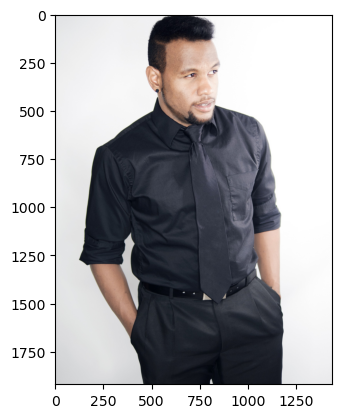

1/1 [==============================] - 0s 165ms/step
[[0.9999988]]
[0.9999988]
the image is of a human
{'horses': 0, 'humans': 1}


In [65]:
import numpy as np
from keras.preprocessing import image

path = 'test/business-1287044_1920.jpg'

img = tf.keras.utils.load_img(path, target_size=(150,150))
x = tf.keras.utils.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = x/255

plt.imshow(tf.keras.utils.load_img(path))
plt.show()

image_tensor = np.vstack([x])
classes = model.predict(image_tensor, batch_size=10)

print(classes)
print(classes[0])

if classes[0] > 0.5:
    print("the image is of a human")
else:
    print("the image is of a horse")
    
print(validation_generator.class_indices)

### Multiclass Classification

In [2]:
import urllib.request
import zipfile

url = "https://storage.googleapis.com/learning-datasets/rps.zip"

file_name = "rps.zip"
training_dir = 'rps/'
urllib.request.urlretrieve(url, file_name)

zip_ref = zipfile.ZipFile(file_name, 'r')
zip_ref.extractall('./')
zip_ref.close()
# downloading the images

training_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = training_datagen.flow_from_directory(
    training_dir,
    target_size=(150,150),
    class_mode='categorical'
)

Found 2520 images belonging to 3 classes.


In [3]:
url = "https://storage.googleapis.com/learning-datasets/rps-test-set.zip"

file_name = "rps-test-set.zip"
validation_dir = 'rps-test-set/'
urllib.request.urlretrieve(url, file_name)

zip_ref = zipfile.ZipFile(file_name, 'r')
zip_ref.extractall('./')
zip_ref.close()
# downloading the images

validation_datagen = ImageDataGenerator(rescale=1/255)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    class_mode='categorical'
)

Found 372 images belonging to 3 classes.


In [4]:
model = tf.keras.models.Sequential([
    
    # Note the input shape is the desired size of the image: 
    # 150x150 with 3 bytes color
    # This is the first convolution 
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)), 
    tf.keras.layers.MaxPooling2D(2, 2),
    
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    
    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    
    # The fourth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    
    # Flatten the results to feed into a DNN 
    tf.keras.layers.Flatten(),
    
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

Metal device set to: Apple M1


2023-01-29 19:02:36.920185: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-01-29 19:02:36.920846: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [5]:
model.compile(loss = 'categorical_crossentropy', 
              optimizer='rmsprop', 
              metrics=['accuracy'])

In [6]:
history = model.fit(train_generator, 
                    epochs=25, 
                    validation_data = validation_generator, 
                    verbose = 1
                   )

Epoch 1/25


2023-01-29 19:02:37.420564: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-01-29 19:02:37.803887: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


79/79 [==============================] - ETA: 0s - loss: 1.1855 - accuracy: 0.3889

2023-01-29 19:03:03.194878: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


79/79 [==============================] - 27s 326ms/step - loss: 1.1855 - accuracy: 0.3889 - val_loss: 1.0810 - val_accuracy: 0.3333
Epoch 2/25
79/79 [==============================] - 28s 354ms/step - loss: 0.8284 - accuracy: 0.6159 - val_loss: 0.3910 - val_accuracy: 0.7419
Epoch 3/25
79/79 [==============================] - 24s 298ms/step - loss: 0.5242 - accuracy: 0.7869 - val_loss: 0.1162 - val_accuracy: 0.9919
Epoch 4/25
79/79 [==============================] - 23s 292ms/step - loss: 0.3215 - accuracy: 0.8742 - val_loss: 0.0923 - val_accuracy: 0.9651
Epoch 5/25
79/79 [==============================] - 27s 347ms/step - loss: 0.2479 - accuracy: 0.9083 - val_loss: 0.0766 - val_accuracy: 0.9570
Epoch 6/25
79/79 [==============================] - 24s 302ms/step - loss: 0.1932 - accuracy: 0.9325 - val_loss: 0.0258 - val_accuracy: 1.0000
Epoch 7/25
79/79 [==============================] - 27s 343ms/step - loss: 0.1515 - accuracy: 0.9484 - val_loss: 0.1391 - val_accuracy: 0.9516
Epoch 8/25

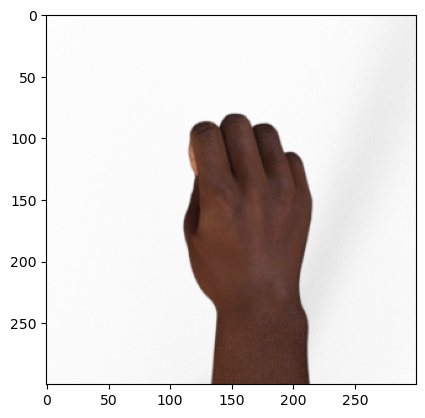

1/1 [==============================] - 0s 11ms/step
[[6.8975492e-10 1.0000000e+00 4.5262995e-11]]
{'paper': 0, 'rock': 1, 'scissors': 2}


In [9]:
import numpy as np
from keras.preprocessing import image

path = 'test/rock07-k03-103.png'

img = tf.keras.utils.load_img(path, target_size=(150,150))
x = tf.keras.utils.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = x/255

plt.imshow(tf.keras.utils.load_img(path))
plt.show()

image_tensor = np.vstack([x])
classes = model.predict(image_tensor, batch_size=10)

print(classes)
    
print(validation_generator.class_indices)

### Dropout Regularization

In [11]:
# reduces chances of neurons becoming overspecialized
tf.keras.layers.Dropout(0.2) 
# this will randomly drop out the specified percentage of neurons in the specified layer.

In [12]:
#examples of use:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)), 
    
    tf.keras.layers.Dense(256, activation=tf.nn.relu), 
    tf.keras.layers.Dropout(0.2), 
    
    tf.keras.layers.Dense(128, activation=tf.nn.relu), 
    tf.keras.layers.Dropout(0.2), 
    
    tf.keras.layers.Dense(64, activation=tf.nn.relu), 
    tf.keras.layers.Dropout(0.2), 
    
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

Dropouts help in recognizing overfitting and removes ambiguity by ensuring the network isn't overspecializing to the training data.

## Chapter 4

In [15]:
import tensorflow as tf
import tensorflow_datasets as tfds 

mnist_data = tfds.load("fashion_mnist") 

for item in mnist_data:
    print(item)


2023-01-29 19:39:42.244536: W tensorflow/core/platform/cloud/google_auth_provider.cc:184] All attempts to get a Google authentication bearer token failed, returning an empty token. Retrieving token from files failed with "NOT_FOUND: Could not locate the credentials file.". Retrieving token from GCE failed with "FAILED_PRECONDITION: Error executing an HTTP request: libcurl code 6 meaning 'Couldn't resolve host name', error details: Could not resolve host: metadata".


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/60000 [00:00<?, ? examples/s]

Shuffling /Users/ammaarkhan/tensorflow_datasets/fashion_mnist/3.0.1.incompleteWB9H7D/fashion_mnist-train.tfrec…

Generating test examples...:   0%|          | 0/10000 [00:00<?, ? examples/s]

Shuffling /Users/ammaarkhan/tensorflow_datasets/fashion_mnist/3.0.1.incompleteWB9H7D/fashion_mnist-test.tfreco…

Dataset fashion_mnist downloaded and prepared to /Users/ammaarkhan/tensorflow_datasets/fashion_mnist/3.0.1. Subsequent calls will reuse this data.
train
test


In [20]:
mnist_train = tfds.load(name="fashion_mnist", split="train") 
assert isinstance(mnist_train, tf.data.Dataset) 
print(type(mnist_train))

<class 'tensorflow.python.data.ops.dataset_ops.PrefetchDataset'>


In [22]:
for item in mnist_train.take(1): 
    print(type(item)) 
    print(item.keys())
    print(item['image'])
    print(item['label'])

<class 'dict'>
dict_keys(['image', 'label'])
tf.Tensor(
[[[  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [ 18]
  [ 77]
  [227]
  [227]
  [208]
  [210]
  [225]
  [216]
  [ 85]
  [ 32]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]]

 [[  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [ 61]
  [100]
  [ 97]
  [ 80]
  [ 57]
  [117]
  [227]
  [238]
  [115]
  [ 49]
  [ 78]
  [106]
  [108]
  [ 71]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]]

 [[  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [ 81]
  [105]
  [ 80]
  [ 69]
  [ 72]
  [ 64]
  [ 44]
  [ 21]
  [ 13]
  [ 44]
  [ 69]
  [ 75]
  [ 75]
  [ 80]
  [114]
  [ 80]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]]

 [[  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [ 26]
  [ 92]
  [ 69]
  [ 68]
  [ 75]
  [ 75]
  [ 71]
  [ 74]
  [ 83]
  [ 75]
  [ 77]
  [ 78]
  [ 74]
  [ 74]
  [ 83]
  [ 77]
  [108]
  [ 34]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]]

 [[  0]
  [  0]
  [  0]
  [  0]
  [  0]


2023-01-29 19:45:19.132474: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


In [23]:
mnist_test, info = tfds.load(name="fashion_mnist", with_info="true") 
print(info)


tfds.core.DatasetInfo(
    name='fashion_mnist',
    full_name='fashion_mnist/3.0.1',
    description="""
    Fashion-MNIST is a dataset of Zalando's article images consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes.
    """,
    homepage='https://github.com/zalandoresearch/fashion-mnist',
    data_path='/Users/ammaarkhan/tensorflow_datasets/fashion_mnist/3.0.1',
    file_format=tfrecord,
    download_size=29.45 MiB,
    dataset_size=36.42 MiB,
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=10),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=10000, num_shards=1>,
        'train': <SplitInfo num_examples=60000, num_shards=1>,
    },
    citation="""@article{DBLP:journals/corr/abs-1708-07747,
    

### Fashion MNIST example with TFDF

In [28]:
(training_images, training_labels), (test_images, test_labels) = tfds.as_numpy(tfds.load('fashion_mnist', 
                                                                                         split = ['train', 'test'],
                                                                                         batch_size=-1,
                                                                                         as_supervised=True))

In [29]:
training_images = training_images / 255.0
test_images = test_images / 255.0

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28,1)),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=5)

Epoch 1/5
  13/1875 [..............................] - ETA: 8s - loss: 1.8847 - accuracy: 0.3510  

2023-01-29 19:53:45.654787: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - 7s 4ms/step - loss: 0.5227 - accuracy: 0.8158
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3936 - accuracy: 0.8583
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3598 - accuracy: 0.8690
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3360 - accuracy: 0.8767
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3241 - accuracy: 0.8819


### Horses or Human with TFDS

In [30]:
data = tfds.load('horses_or_humans', split='train', as_supervised=True)

train_batches = data.shuffle(100).batch(10)

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu',
                           input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(optimizer='Adam', loss='binary_crossentropy',
metrics=['accuracy'])
history = model.fit(train_batches, epochs=10)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/1027 [00:00<?, ? examples/s]

Shuffling /Users/ammaarkhan/tensorflow_datasets/horses_or_humans/3.0.0.incomplete00W2GH/horses_or_humans-train…

Generating test examples...:   0%|          | 0/256 [00:00<?, ? examples/s]

Shuffling /Users/ammaarkhan/tensorflow_datasets/horses_or_humans/3.0.0.incomplete00W2GH/horses_or_humans-test.…

Dataset horses_or_humans downloaded and prepared to /Users/ammaarkhan/tensorflow_datasets/horses_or_humans/3.0.0. Subsequent calls will reuse this data.
Epoch 1/10


2023-01-29 20:21:07.634866: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


103/103 [==============================] - 8s 64ms/step - loss: 3.8063 - accuracy: 0.8676
Epoch 2/10
103/103 [==============================] - 6s 56ms/step - loss: 0.0594 - accuracy: 0.9747
Epoch 3/10
103/103 [==============================] - 6s 56ms/step - loss: 0.0539 - accuracy: 0.9834
Epoch 4/10
103/103 [==============================] - 7s 66ms/step - loss: 0.0337 - accuracy: 0.9883
Epoch 5/10
103/103 [==============================] - 6s 62ms/step - loss: 0.0425 - accuracy: 0.9883
Epoch 6/10
103/103 [==============================] - 6s 58ms/step - loss: 0.0901 - accuracy: 0.9747
Epoch 7/10
103/103 [==============================] - 6s 56ms/step - loss: 0.3139 - accuracy: 0.9017
Epoch 8/10
103/103 [==============================] - 6s 57ms/step - loss: 0.1466 - accuracy: 0.9416
Epoch 9/10
103/103 [==============================] - 6s 57ms/step - loss: 0.0762 - accuracy: 0.9834
Epoch 10/10
103/103 [==============================] - 6s 57ms/step - loss: 0.0273 - accuracy: 0.9903
